In [1]:
#告诉 Jupyter 获取 matplotlib 生成的所有图形，并将其嵌入 notebook 中
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt

# Read data from csv
pga = pd.read_csv("pga.csv")
#测试输出
#print((pga.distance-pga.distance.mean())/pga.distance.std())


In [2]:
# Normalize the data 归一化值 (x - mean) / (std)
# mean()平均值  median()中位数  max()最大值  min()最小值  sum()求和  std()标准差

pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())


   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


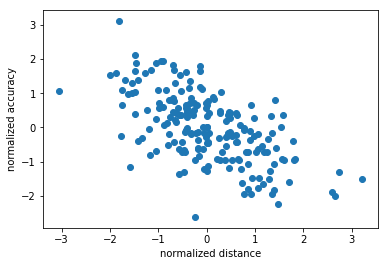

In [3]:

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# We can add a dimension to an array by using np.newaxis
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

# The X variable in LinearRegression.fit() must have 2 dimensions
lm = LinearRegression()
lm.fit(pga.distance[:, np.newaxis], pga.accuracy)
theta1 = lm.coef_[0]
print (theta1)

Shape of the series: (197,)
Shape with newaxis: (197, 1)
-0.6075988227151214


1.599438422599817


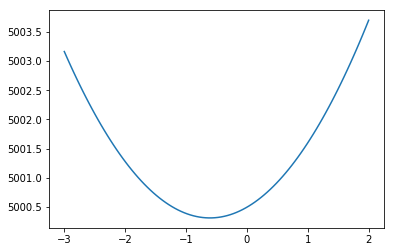

In [5]:

# The cost function of a single variable linear model# The c 
# 单变量 代价函数
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    # 通过每次观察进行循环
    for i in range(m):
        # Compute the hypothesis 
        # 计算假设
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)
costs = []
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga.distance, pga.accuracy))

plt.plot(theta1s, costs)
plt.show()

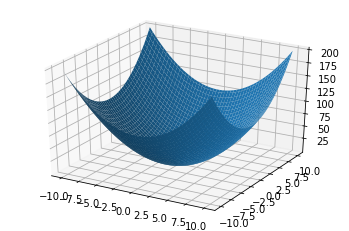

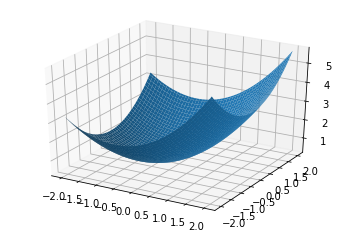

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)
#print(X[:5,:5],"\n",Y[:5,:5])

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure()
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

# Use these for your excerise 
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=(100,100))
# Meshgrid for paramaters 
T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

# make 3d plot
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
plt.show()

In [7]:

# 对 theta1 进行求导# 对 thet 
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)

# 对theta0 进行求导
# Partial derivative of cost in terms of theta0
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Difference between hypothesis and observation
    diff = (h - y)
    # Compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)
print("partial0 =", partial0)

partial1 = 5.5791338540719
partial0 = 1.0000000000000104


Theta0 = 1.4077402526252135e-14
Theta1 = -0.6046983166379609
costs = [0.4974619289340103, 0.46273605725902506, 0.43457636303154484, 0.41174127378146347, 0.39322398105637657, 0.37820804982390627, 0.36603142151620477, 0.3561572235961118, 0.34815009862675567, 0.3416570091835696, 0.3363916722894201, 0.3321219370807079, 0.3286595491805573, 0.3258518504861169, 0.32357504841017987, 0.3217287578152319, 0.32023157499156085, 0.31901748853429884, 0.31803296887350535, 0.3172346081334677, 0.3165872062616559, 0.31606221904396564, 0.3156364995786098, 0.3152912777197228, 0.3150113324939302, 0.3147843210013881, 0.3146002342122662, 0.31445095566451636, 0.3143299036057311, 0.314231740800982, 0.3141521392119381, 0.3140875891718851, 0.3140352446430773, 0.31399279773376704, 0.3139583769423102, 0.3139304646418918, 0.31390783016773566, 0.3138894755565916, 0.31387459154612474, 0.3138625218942078, 0.31385273444493683, 0.3138447976656583, 0.31383836162051826, 0.31383314254164574, 0.31382891031771304, 0.313825478

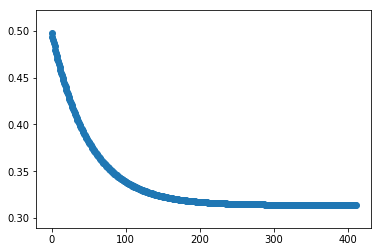

In [8]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations 最大迭代次数
    counter = 0       # Intialize a counter 当前第几次
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost 当前代价函数
    costs = [c]     # Lets store each update 每次损失值都记录下来
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    # 设置一个收敛的阈值 (两次迭代目标函数值相差没有相差多少,就可以停止了)
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    # 两次间隔迭代目标函数值相差没有相差多少(说明可以停止了)
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        # 先求导, 导数相当于步长
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        # -= 梯度下降，+=梯度上升
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        # 当前迭代之后，参数发生更新  
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates，可以进行保存当前代价值
        costs.append(c)
        counter += 1   # Count
        
    # 将当前的theta0, theta1, costs值都返回去
    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta0 =", gradient_descent(pga.distance, pga.accuracy)['theta0'])
print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
print("costs =", gradient_descent(pga.distance, pga.accuracy)['costs'])

descend = gradient_descent(pga.distance, pga.accuracy, alpha=.01)
plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()